Q1 

To use the majority vote, we classify each bootstrap sample as "Red" if $P(Red ∣ 𝑋)>0.5$. For this sample, $P(Red ∣ 𝑋)=0.6$, thus the final classification will be the class **Red**.

The average probability of RED is 0.45 <0.5, thus the final classification is **Green**.

Q2 

In gradient boosting, since each decision tree can only be divided based on one feature, the final prediction is the sum of multiple single-feature base models. That is, the final regression function can be decomposed into the sum of functions contributed by each feature separately.

Q3 (a)
![hw7_1.png](hw7_1.png)

Q3 (b)

![](hw7_2.jpg)

Q3 (c)

![](hw7_3.jpg)

Q4 (a)

In [19]:
import pandas as pd

crabs=pd.read_csv("./dataset/crabs.csv")
crabs.describe()

X=crabs.iloc[:,1:].drop(columns=["sp","index"])
X['sex'] = X['sex'].map({'M': 1, 'F': 0})

y=crabs["sp"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 6789,stratify=y)


Q4 (b)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [23]:
param_grid_small = {'max_leaf_nodes': range(2,6)} 

clf_small = DecisionTreeClassifier(random_state=6789)

grid_search_small = GridSearchCV(clf_small, param_grid_small, cv=5, scoring='accuracy')
grid_search_small.fit(X_train, y_train)

best_clf_small = grid_search_small.best_estimator_
best_max_leaf_nodes_small = grid_search_small.best_params_['max_leaf_nodes']

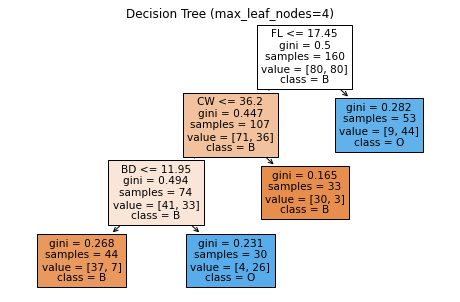

4
0.14375000000000004
0.22499999999999998


In [28]:

train_error_small = 1-best_clf_small.score(X_train, y_train)
test_error_small = 1-best_clf_small.score(X_test, y_test)

plt.figure(figsize=(8,5))
plot_tree(best_clf_small, filled=True, feature_names=X.columns, class_names=best_clf_small.classes_)
plt.title(f"Decision Tree (max_leaf_nodes={best_max_leaf_nodes_small})")
plt.show()

print(best_max_leaf_nodes_small)
print(train_error_small)
print(test_error_small)


Q4 (c)

In [32]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_clf = RandomForestClassifier(n_estimators=1000, max_features=5, random_state=6789, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=1000, n_jobs=-1,
                       random_state=6789)

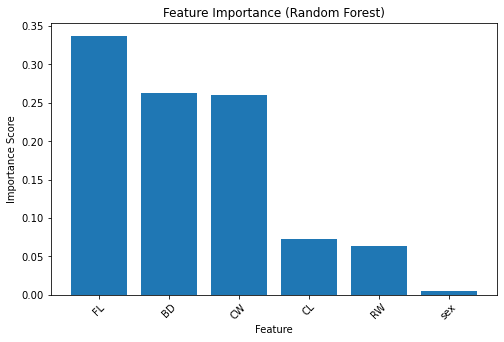

0.0
0.125


In [35]:
train_error_rf = 1 - rf_clf.score(X_train, y_train)
test_error_rf = 1 - rf_clf.score(X_test, y_test)

feature_importances = rf_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), X.columns[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()

print(train_error_rf)
print(test_error_rf)

Q4 (d)


In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_clf = HistGradientBoostingClassifier(max_iter=1000, random_state=6789)
hgb_clf.fit(X_train, y_train)

HistGradientBoostingClassifier(max_iter=1000, random_state=6789)

In [39]:
train_errors = []
test_errors = []
iterations = list(range(1, 1001))

for i, (y_train_pred, y_test_pred) in enumerate(zip(hgb_clf.staged_predict(X_train), hgb_clf.staged_predict(X_test))):
    train_errors.append(1 - (y_train_pred == y_train).mean()) 
    test_errors.append(1 - (y_test_pred == y_test).mean()) 

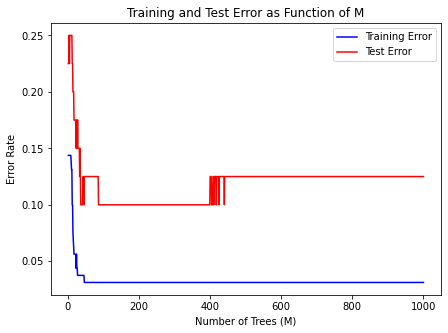

In [44]:
plt.figure(figsize=(7,5))
plt.plot(iterations, train_errors, label="Training Error", color="blue")
plt.plot(iterations, test_errors, label="Test Error", color="red")
plt.xlabel("Number of Trees (M)")
plt.ylabel("Error Rate")
plt.title("Training and Test Error as Function of M")
plt.legend()
plt.show()

In [47]:
optimal_M = iterations[np.argmin(test_errors)]
train_error_optimal = train_errors[np.argmin(test_errors)]
test_error_optimal = min(test_errors)


print(f"Best number of trees is {optimal_M}.") 
print(train_error_optimal)
print(test_error_optimal)

Best number of trees is 36.
0.03749999999999998
0.09999999999999998


Q4 (e)


In [56]:
summary_data = {
    "Model": ["Decision Tree", "Random Forest", "HistGradientBoosting"],

    "Training Error": [
        train_error_small if 'train_error_small' in locals() else None,
        train_error_rf if 'train_error_rf' in locals() else None,
        train_error_optimal if 'train_error_optimal' in locals() else None
    ],
    "Test Error": [
        test_error_small if 'test_error_small' in locals() else None,
        test_error_rf if 'test_error_rf' in locals() else None,
        test_error_optimal if 'test_error_optimal' in locals() else None
    ],
    "Performance Rank":[3,2,1]
}

model_comparison = pd.DataFrame(summary_data)
print(model_comparison)

                  Model  Training Error  Test Error  Performance Rank
0         Decision Tree         0.14375       0.225                 3
1         Random Forest         0.00000       0.125                 2
2  HistGradientBoosting         0.03750       0.100                 1


In [58]:

model_comparison["Test Error"] = pd.to_numeric(model_comparison["Test Error"], errors='coerce')
best_index = model_comparison["Test Error"].idxmin()
best_name = model_comparison.loc[best_index, "Model"]

print(f"{best_model_name} is the best model.")


HistGradientBoosting is the best model.
